# Zdatność wody do picia - analiza objaśniająca i storytelling

## Wstęp

![Image of Yaktocat](https://images.pexels.com/photos/2519383/pexels-photo-2519383.jpeg?cs=srgb&dl=pexels-kelly-lacy-2519383.jpg&fm=jpg)

Woda jest niezbędna do życia roślin, zwierząt i ludzi. Stanowi ona około 60-70% masy ciała człowieka. Jest niezbędna do prawidłowego funkcjonowania naszego organizmu. W przyrodzie praktycznie nie występuje chemicznie czysta.

Poprzez to, iż jest bardzo dobrym rozpuszczalnikiem zawiera prawie wszystkie substancje naturalne występujące w skorupie ziemskiej oraz substancje będące efektem działalności człowieka. 

Do prawidłowego funkcjonowania organizm ludzki potrzebuje nie tylko wody, ale również substancji w niej rozpuszczonych (makroskładników i mikroskładników). Za mała jak i za duża ilość poszczególnych składników może mieć wpływ na (to czy woda jest bezpieczna do spożycia przez ludzi) zdatność wody do spożycia przez ludzi.  
 

#Innymi słowy 
#Od zawartości tych substancji zależy, czy woda jest bezpieczna do spożycia przez ludzi.

W zadaniu tym będzie analizowany zbiór danych, który zawiera wskaźniki jakości wody dla 3276 różnych zbiorników wodnych. 

Mierzone wskaźniki jakości wody:
- ph - wartość ph,
- Hardness - twardość (zdolność wody do wytrącania mydła w mg/l),
- Solids - całkowita zawartość rozpuszczonych substancji stałych (TDS),
- Chloramines - zawartość chloru i chloraminy,
- Sulfate - siarczan,
- Conductivity - przewodność prądu elektrycznego,
- Organic_carbon - całkowity węgiel organiczny (TOC),
- Trihalomethanes - trihalometany,
- Turbidity - mętność.

## Analiza

Załadowanie potrzebnych bibliotek

In [50]:
# Import python libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import seaborn as sns
import holoviews as hv
import copy
from bokeh.models import HoverTool

Załadowanie zbioru

In [51]:
waterDf = pd.read_csv("water_potability.csv")

### Badanie struktury danych

Poniższa tabela przedstawia kilka pierwszych obiektów w zbiorze. Możliwym jest obejrzenie wszystkich obiektów w zbiorze oraz sortowanie.

In [52]:
pn.widgets.DataFrame(waterDf, autosize_mode='fit_columns', height=300, width=900, show_index=False, auto_edit=False)

DataFrame(autosize_mode='fit_columns', height=300, show_index=False, sizing_mode='fixed', value=            ph  ..., width=900)

Po obejrzeniu powyższej tabeli można zauważyć, że podczas zbierania danych nie udało się pozyskać niektórych odczytów wskaźników jakości wody w poszczególnych zbiornikach. Braki odczytów można zaobserwować w kolumnie ph i Sulfate. 

In [53]:
waterDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Wszystkie wartości wskaźników jakości wody są liczbami rzeczywistymi. Jedynie kolumna przechowywująca zmienną zależną (Potability - czy woda ze zbiornika jest bezpieczna do picia) jest typu całkowitego. Dodatkowo można potwierdzić, że zbiór przechowuje dane o 3276 próbkach wody. Można również zauważyć, że w kolumnie Trihalomethanes znajdują się także brakujące wartości. 

### Statystyki opisowe

In [54]:
waterDf.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Z danych statystycznych wynika, że minimalne ph wody w badanych zbiornikach jest równe dolnemu zakresowi skali ph, a maksymalne ph próbek wody równe jest górnemu zakresowi skali ph. Mediana i średnia z wartości ph są prawie równe (to samo tyczy się kolumny Hardness).

## Rozkłady wartości zmiennych 

Przed utworzeniem rozkładów przydatne jest sprawdzenie jak wiele różnych (unikalnych) wartości posiada każda kolumna - aby wyeliminować z analizy niepotrzebne dane. Ze względu na to, że wskaźniki dla każdej próbki wody mogą być inne (odczyty są liczbami rzeczywistymi) kolumny mogą przechowywać 3276 (tyle ile wszystkich próbek) różnych wartości. Nie istnieje kolumna pełniąca roli identyfikatora. Reasumując, na tą chwilę w zbiorze nie odnaleziono żadnych niepotrzebnych danych.


In [6]:
waterDf.nunique(axis=0)

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

#### Usunięcie ewentualnych duplikatów

In [55]:
duplicate = waterDf.duplicated()
print(duplicate.any())

False


Zbiór nie zawiera zduplikowanych wierszy.

### Histogramy dla każdego wskaźnika jakości wody bez zastępowania brakujących wartości

In [76]:
from scipy.stats import norm
hover = HoverTool(tooltips=[("Przedział wartości", "@left{0.00} do @right{0.00}"),("Liczba próbek", "@top")]) 

pn.extension()
cols = list(waterDf.columns)[:-1]

bins = pn.widgets.IntSlider(name='Liczba binów', start=5, end=25, step=5, value=25)
chooseHistogram = pn.widgets.Select(name='Kolumna', options=cols)
#normed = pn.widgets.Checkbox(name='Czy znormalizowany?')
@pn.depends(bins.param.value,chooseHistogram.param.value)
def get_plot(bins,hist):
    #normed=False
   # if norm:
        #normed=True
    plot = waterDf[hist].hvplot.hist(bins=bins, normed=False, xlabel=hist, ylabel='Liczba obserwacji', padding=0).opts(tools=[hover])    
    return plot

widgets = pn.WidgetBox('## Histogramy', bins, chooseHistogram)


pn.Row(widgets, get_plot).servable()


Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] IntSlider(end=25, name='Liczba binów', start=5, step=5, value=25)
        [2] Select(name='Kolumna', options=['ph', 'Hardness', ...], value='ph')
    [1] ParamFunction(function)

#### Ph
Chemicznie czysta woda ma pH równe 7. W zbiorze najwięcej próbek wody posiada właśnie wartość ph ok 7 (między 6,72 a 7,28) - mieszczący się w przedziale ph śliny człowieka.. Następnie w zbiorze najczęściej można odnaleźć wodę o ph między 7,28 a 7,84. Trzeci najczęściej występujący zakres wartości ph wody w zbiornikach jest między 6,16 a 6,72. 

W zbiorze występują wody o bardzo niskim ph (0, 1, 2, 3) jak i o bardzo wysokim (12, 13, 14) - choć jest ich zdecydowanie mniej od wód, których wartość ph wynosi między 3 a 12.

#### Hardness - twardość wody
Twardość wody w badanych próbkach najczęściaj osiąga ok 200 mg/l. 
Mała liczba próbek wody posiada twardość między 50 a 125 mg/l oraz między 270 a 325 mg/l.

#### Solids - całkowita zawartość rozpuszczonych substancji stałych (TDS)
Zawartość nieorganicznych i niektórych organicznych minerałów lub soli w badanej wodzie najczęściej wynosi od około 16562 do 20623 ppm (liczba części na milion). W zbiorze znajduje się mało próbek o ppm od ok 320 do 12500 oraz 36864 do 61227 ppm. Doskonale widać to przy ustawieniu liczby binów na 15.

#### Chloramines
Ilość chloramin najczęściej wynosi ok między 6,3 a 8 ppm.

#### Sulfate
Ilość rozpuszczonych siarczanów najczęściej wynosi ok między 305 a 340 mg/l .

#### Conductivity
Przewodnictwo elektryczne wody najczęściej wynosi ok między 353 a 367 μS/cm.

#### Organic_carbon
Ilość węgla organicznego w próbkach wody najczęściaj wynosi ok między 13 do 15 ppm.

#### Trihalomethanes
Ilość trihalometanów w próbkach wody najczęściaj wynosi ok między 62 do 74 μg/l. EPA ustaliła górny limit TTHM (total trihalomethanes) w wodzie pitnej 80 ppm. 

#### Turbidity - mętność
Miara emitowania światła przez wodę (Nephelometric Turbidity Units) w próbkach wody najczęściaj wynosi ok między 3,5 a 4,6 NTU.

### Histogram dla zmiennej zależnej

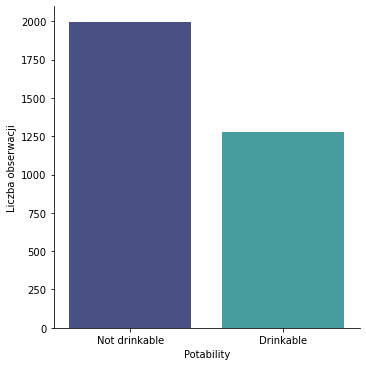

In [77]:
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
dfColor=waterDf.copy()
dfColor.loc[dfColor['Potability'] == 1, 'Potability'] = 'Drinkable'
dfColor.loc[dfColor['Potability'] == 0, 'Potability'] = 'Not drinkable'

histDrinkable=sns.catplot(x="Potability", kind="count", palette="mako", data=dfColor)
histDrinkable.set(ylabel='Liczba obserwacji')

plt.show()

W zbiorze znajduje się około 2000 próbek wody, które nie są bezpieczne do picia oraz około 1250 zdatnych do spożycia.

## Brakujące wartości

Jak wspomniano wcześniej brakujące wartości znajdują się w trzech kolumnach:
- ph,
- Sulfate,
- Trihalomethanes.

Poniższy wykres pozwala w sposób obrazowy zobaczyć jak wiele pustych wartości znajduje się w każdej z kolumn.

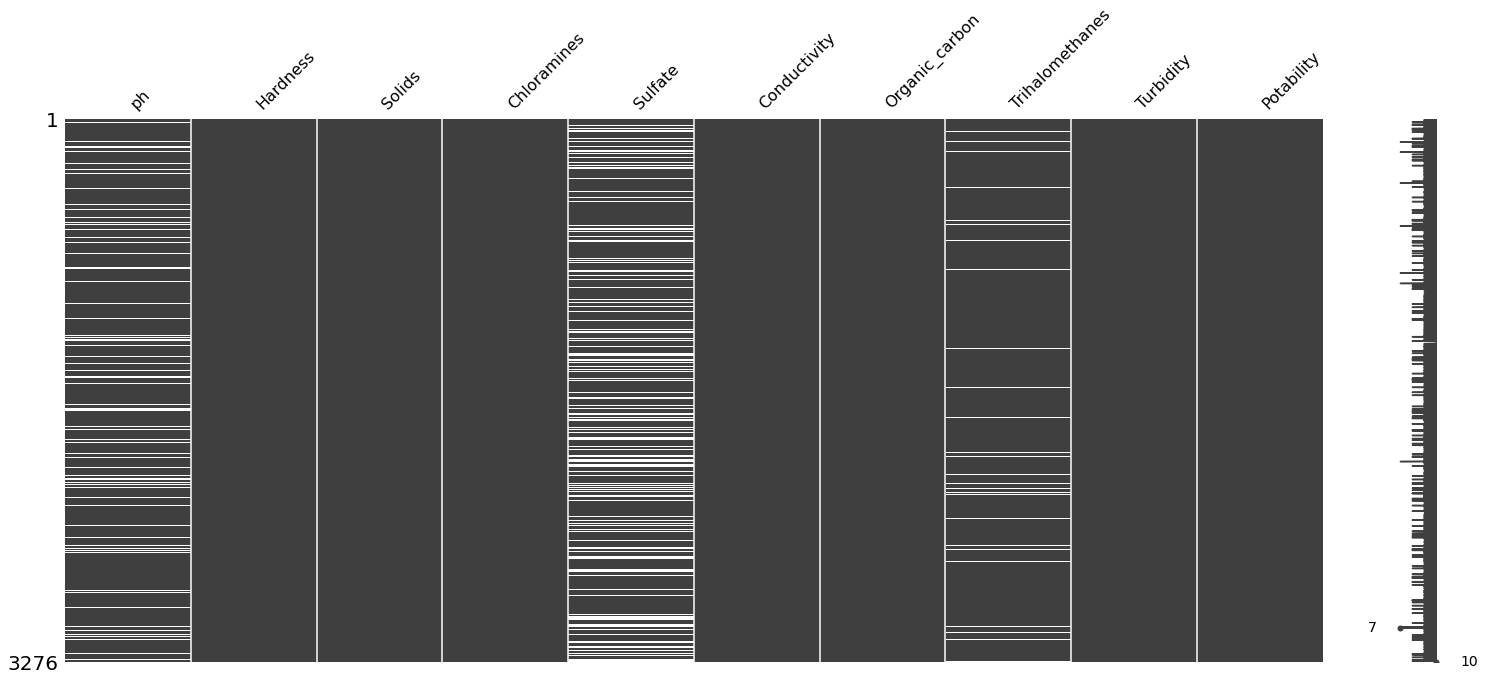

In [57]:
msno.matrix(waterDf)
plt.show()

In [58]:
waterDf.isnull().sum()/len(waterDf)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

Puste wartości w kolumnie ph stanowią około 15%, a w kolumnie Sulfate około 24%. 

W kolumnie Trihalomethanes znajduje się bardzo mało brakujących wartości i stanowią one jedynie około 5%.


#### Czy to, że w kolumnie Trihalomethanes znajdują się brakujące wartości ma wpływ na występowanie pustych wartości w pozostałych kolumnach?

In [59]:
dfWhereTrihalomethanesIsNa=waterDf[waterDf['Trihalomethanes'].isna()]
dfWhereTrihalomethanesIsNa.isnull().sum()/len(dfWhereTrihalomethanesIsNa)

ph                 0.160494
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.246914
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    1.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

Procent brakujących wartości w pozostałych kolumnach (ph i Sulfate) jest bardzo podobny do tego uzyskanego dla całego zbioru. Oznacza to, że brak odczytu ilości trihalometanów w próbce wody nie ma wpływu na występowanie brakujących wartości w pozostałych kolumnach. 


In [63]:
dfWhereTrihalomethanesIsNa.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,136.000000,162.000000,162.000000,162.000000,122.000000,162.000000,162.000000,0.0,162.000000,162.000000
mean,7.093360,195.582773,22955.382834,7.094534,336.377753,418.117121,14.366659,NaN,3.982957,0.339506
std,1.780577,32.844180,9462.822273,1.640883,41.414912,78.049191,3.144270,NaN,0.842103,0.475010
min,0.975578,47.432000,4142.499001,2.750837,217.000607,256.302559,5.426650,NaN,2.200678,0.000000
25%,6.114524,179.453142,15380.374078,5.988364,314.026289,356.467856,12.177244,NaN,3.367339,0.000000
50%,6.976563,195.359854,21826.555150,7.246161,336.582713,419.646061,14.172834,NaN,3.867133,0.000000
75%,8.141495,213.764176,29468.162803,8.094569,359.804317,463.752669,16.473530,NaN,4.552808,1.000000
max,13.175402,308.253833,49341.421279,11.996015,462.474215,605.458893,21.692974,NaN,6.204846,1.000000


In [64]:
dfWherePhIsNa=waterDf[waterDf['ph'].isna()]
dfWherePhIsNa.isnull().sum()/len(dfWherePhIsNa)

ph                 1.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.228106
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.052953
Turbidity          0.000000
Potability         0.000000
dtype: float64

Brak odczytu wartości ph próbki wody nie ma wpływu (lub ma niewielki) na występowanie brakujących wartości w pozostałych kolumnach.

In [65]:
dfWhereSulfateIsNa=waterDf[waterDf['Sulfate'].isna()]
dfWhereSulfateIsNa.isnull().sum()/len(dfWhereSulfateIsNa)

ph                 0.143406
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            1.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.051216
Turbidity          0.000000
Potability         0.000000
dtype: float64

Procent brakujących wartości w kolumnie Trihalomethanes jak i ph jest bardzo podobny do tego uzyskanego dla całego zbioru.

Fakt, iż obecność pustych wartości w jednej kolumnie nie wpływa na ich brak w pozostałych kolumnach może oznaczać, że badania laboratoryjne dotyczące tych wskaźników nie są zgrupowane w zestaw testów lub urządzenia mierzące parametry jakościowe wody nie odpowiadają za wszystkie 3 wskaźniki.

W chwili, gdy dane laboratorium nie przepowadziłoby pewnego zestawu testów - wszystkie (lub część) parametry jakości wody w nim zawarte byłyby nieokreślone. 


#### Zastępowanie pustych wartości w kolumnie Trihalomethanes
Gdy kolumna zawierająca dane ilościowe posiada małą liczbę brakujących wartości można je zastąpić wartością średnią, medianą, minimalną lub maksymalną. 

Ze względu na to, że wartość w kolumnie Trihalomethanes w zdecydowanej większości próbek wody wynosi około między 50 a 75 μg/l (wartość średniej i mediany mieści się w tym przedziale) - brakujące wartości w kolumnie Trihalomethanes zostaną zastąpione medianą.

In [66]:
waterDf['Trihalomethanes'].fillna(waterDf['Trihalomethanes'].median(), inplace=True)
waterDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Zastępowanie pustych wartości w pozostałych kolumnach

Jak wcześniej wspomniano w kolumnie Sulfate i ph występuje dużo więcej brakujących wartości niż w kolumnie Trihalomethanes. Zastępowanie pustych wartości w tych kolumnach jedną wartością (np. średnią lub medianą) może naruszyć naturalnie występujące korelacje między zmiennymi oraz bardzo zmienić rozkłady zmiennych. Aby nie dopuścić do takiej sytuacji zostosowano pakiet fancyimpute, który zastąpi brakujące wartości przy użyciu algorytmu KNN.

In [67]:
from fancyimpute import KNN
knn_imputer = KNN(3)
waterDf_missing_knn = waterDf.copy(deep=True)
waterDf_missing_knn.iloc[:, :] = knn_imputer.fit_transform(waterDf_missing_knn)

Imputing row 1/3276 with 1 missing, elapsed time: 1.965
Imputing row 101/3276 with 0 missing, elapsed time: 1.969
Imputing row 201/3276 with 0 missing, elapsed time: 1.971
Imputing row 301/3276 with 1 missing, elapsed time: 1.974
Imputing row 401/3276 with 0 missing, elapsed time: 1.976
Imputing row 501/3276 with 0 missing, elapsed time: 1.979
Imputing row 601/3276 with 1 missing, elapsed time: 1.981
Imputing row 701/3276 with 1 missing, elapsed time: 1.985
Imputing row 801/3276 with 0 missing, elapsed time: 1.987
Imputing row 901/3276 with 1 missing, elapsed time: 1.990
Imputing row 1001/3276 with 0 missing, elapsed time: 1.992
Imputing row 1101/3276 with 1 missing, elapsed time: 1.994
Imputing row 1201/3276 with 0 missing, elapsed time: 1.997
Imputing row 1301/3276 with 0 missing, elapsed time: 2.000
Imputing row 1401/3276 with 0 missing, elapsed time: 2.003
Imputing row 1501/3276 with 0 missing, elapsed time: 2.005
Imputing row 1601/3276 with 0 missing, elapsed time: 2.008
Imputing 

Po zostosowaniu algorytmu w zbiorze nie występują już brakujące wartości.

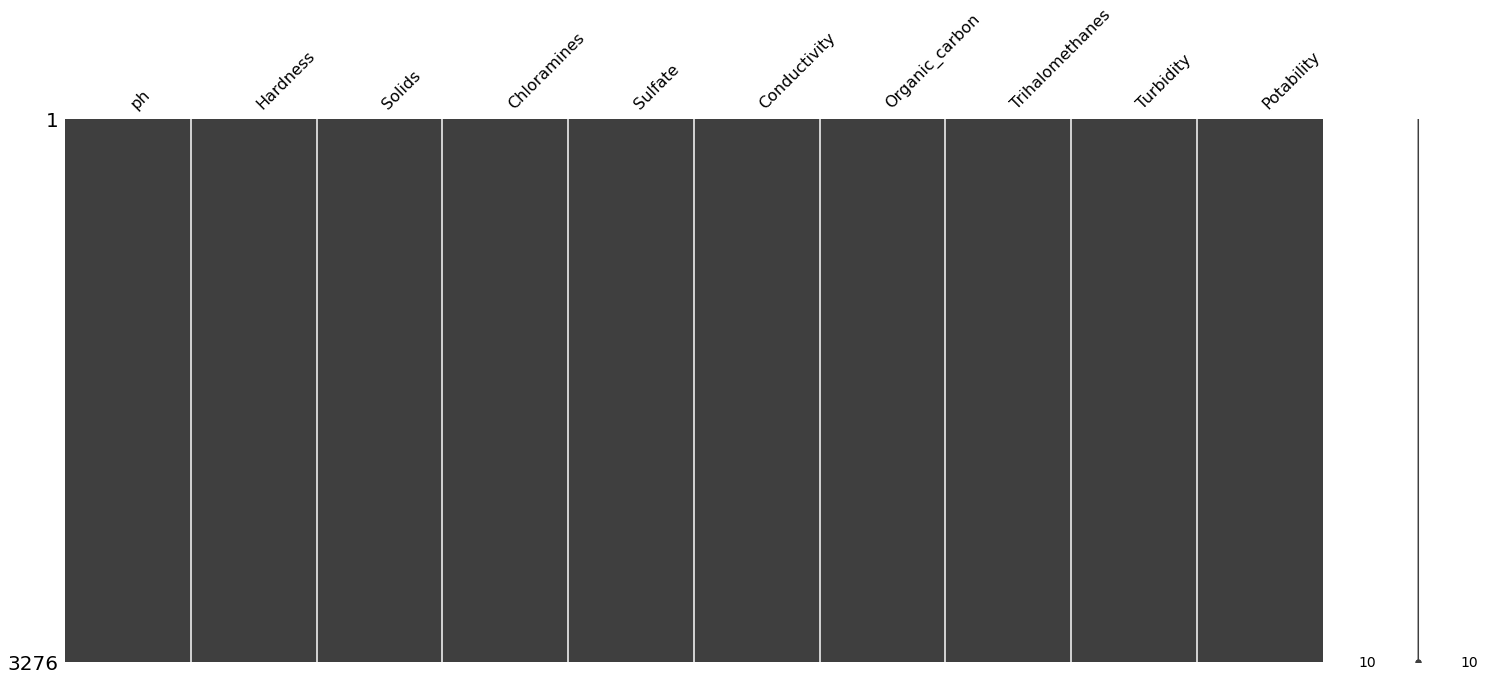

In [68]:
msno.matrix(waterDf_missing_knn)
plt.show()

Zbiór po usunięciu pustych wartości.

In [69]:
pn.widgets.DataFrame(waterDf_missing_knn, autosize_mode='fit_columns', height=300, width=900, show_index=True, auto_edit=False)

DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=            ph  ..., width=900)

In [70]:
dfWherePhIsNa2=waterDf[waterDf['ph'].isna()]
pn.widgets.DataFrame(dfWherePhIsNa2, autosize_mode='fit_columns', height=300, width=900, show_index=True, auto_edit=False)

DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=      ph    Hardness  ..., width=900)

Obiekt o indeksie równym 0 nie miał określonego ph, a teraz ph równe jest w przybliżeniu 6.649364. Wartość ph dla obiektu o indeksie 8 (oryginalnie posiadający brakującą wartość w kolumnie ph) w przybliżeniu równa jest 7.641209. Wartość ph w obu obiektach jest inna dzięki zastosowaniu algorytmu KNN. 

## Analiza zależności między zmiennymi

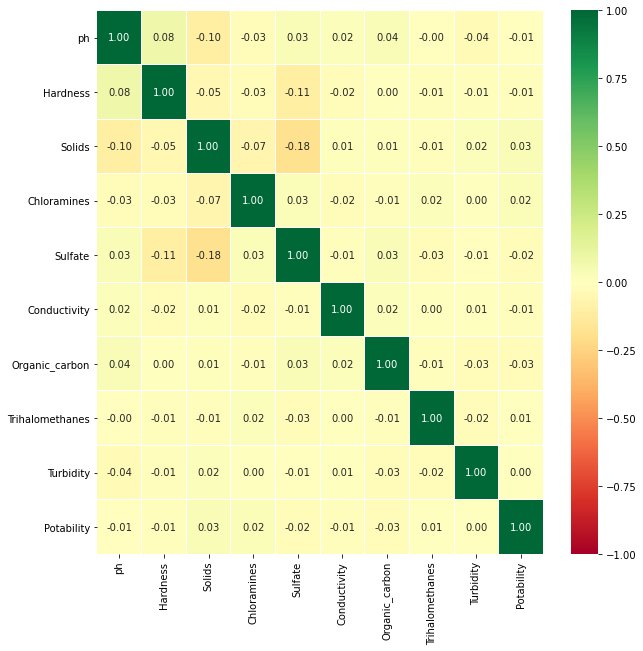

In [71]:
plt.figure(figsize=(10, 10))
sns.heatmap(waterDf_missing_knn.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap='RdYlGn', vmin=-1, vmax=+1)
plt.show()

Korelacje pomiędzy kolumnami są niewielkie. 

Największe zależności między wartościami atrybutów można zaobserwować między kolumnami:
- Sulfate i Solids (-0,18),
- Sulfate i Hardness(-0,11),
- Solids i ph (-0,10),
- Hardness i ph (0,08),
- Chloramines i Solids (-0,07)
- Solids i Hardness (-0,05).


Największy wpływ na to, że woda jest bezpieczna do spożycia ma zawartość rozpuszczonych substancji stałych (Solids), ilość węgla organicznego (Organic_carbon), ilość chloramin i ilość rozpuszczonych siarczanów.

#### Największy wpływ na zdatność wody do spożycia ma zawartość rozpuszczonych substancji stałych

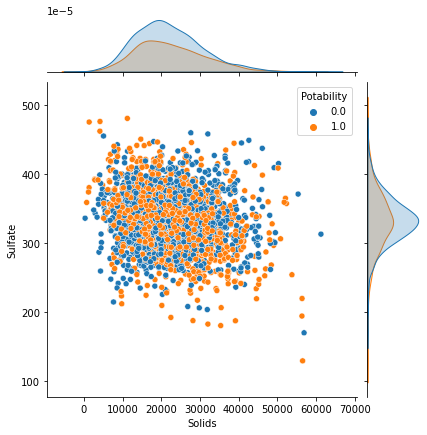

In [22]:
sns.jointplot(x='Solids',y='Sulfate',data=waterDf_missing_knn,hue='Potability')

In [72]:
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_file, show
dfClasstoString=waterDf_missing_knn.copy()

dfClasstoString.loc[dfClasstoString['Potability'] == 1, 'Potability'] = 'Drinkable'
dfClasstoString.loc[dfClasstoString['Potability'] == 0, 'Potability'] = 'Not drinkable'

dfDrinkable=dfClasstoString[dfClasstoString['Potability']=='Drinkable']
dfNotDrinkable=dfClasstoString[dfClasstoString['Potability']=='Not drinkable']



In [79]:
chooseX = pn.widgets.Select(name='Kolumna (oś X)', options=cols, value='Sulfate' )
chooseY = pn.widgets.Select(name='Kolumna (oś Y)', options=cols,value='Solids' )
classes=[dfDrinkable, dfNotDrinkable]
@pn.depends(chooseX.param.value,chooseY.param.value)
def get_scatterplot(chooseX,chooseY):
    p = figure(plot_width=500, plot_height=450, tools=["hover", "wheel_zoom","pan","box_zoom"])
    for data, name, color in zip(classes,['Drinkable', 'Not drinkable'], ['black','blue'] ):
        df = pd.DataFrame(data)           
        p.scatter(df[chooseX], df[chooseY], line_width=2, color=color, alpha=0.5, legend_label=name)
        p.legend.location = "bottom_left"
        
        p.legend.click_policy="hide"                 
    return p
                   
widgets = pn.WidgetBox('## Wykresy punktowe', chooseX, chooseY)

pn.Row(widgets, get_scatterplot).servable()


Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] Select(name='Kolumna (oś X)', options=['ph', 'Hardness', ...], value='Sulfate')
        [2] Select(name='Kolumna (oś Y)', options=['ph', 'Hardness', ...], value='Solids')
    [1] ParamFunction(function)

Ze wzgędu na to, że korelacja między ilością siarczanów a całkowitą zawartością rozpuszczonych substancji stałych wynosi tylko -0,18 na wykresie widać tylko minimalnie, że gdy w wodzie rośnie zawartość siarczanów to maleje ilość TDS. 

Wody wysokozmineralizowane cechują się niskim ph - np. Muszynianka – pH 6,2, Piwniczanka – pH 6,5. 
Ilość TDS zależy od zawartości w wodzie kationów: wapnia, magnezu, potasu i sodu oraz anionów: węglany, azotany, wodorowęglany, chlorki i siarczany.
Wody wysokozmineralizowane posiadają wyższe TDS (w porównaniu do wód średnio i nisko zmineralizowanych) oraz mają najczęściej niższe od nich ph - w tym przykładzie można zauważyć korelację między tymi dwoma wskaźnikami.

In [81]:
chooseX = pn.widgets.Select(name='Kolumna (oś X)', options=cols, value='Sulfate' )
chooseY = pn.widgets.Select(name='Kolumna (oś Y)', options=cols,value='Solids' )
color_cycle = hv.Cycle(['blue', 'black'])
@pn.depends(chooseX.param.value,chooseY.param.value)
def get_scatterplot2(X,Y):
   
        scatter=dfClasstoString.hvplot.scatter(x=X, y=Y, c="Potability",
                  legend='top_right', height=500, width=550)
         #sns.lmplot(x=chooseX, y=chooseY, data=data)
        #scatter.opts(size=10) * hv.Slope.from_scatter(scatter)
        return scatter
                   
widgets = pn.WidgetBox('##Wykresy punktowe', chooseX, chooseY)

pn.Row(widgets, get_scatterplot2).servable()


Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] Select(name='Kolumna (oś X)', options=['ph', 'Hardness', ...], value='Sulfate')
        [2] Select(name='Kolumna (oś Y)', options=['ph', 'Hardness', ...], value='Solids')
    [1] ParamFunction(function)

In [43]:
#sns.lmplot(x="Sulfate", y="Solids", data=dfClasstoString, x_estimator=np.mean)

In [36]:
#hvplot.scatter_matrix(dfClasstoString, 'Potability')

In [38]:
#hvplot.parallel_coordinates(dfClasstoString[['Sulfate','Solids','Potability']], 'Potability')

In [39]:
#from hvplot import parallel_coordinates
#parallel_coordinates(dfClasstoString, 'Potability')

In [82]:
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_file, show

chooseColumn = pn.widgets.Select(name='Kolumna', options=cols, value='Hardness')

@pn.depends(chooseColumn.param.value)
def get_boxplot(chooseColumn):
    bp=hv.BoxWhisker(dfClasstoString, 'Potability',str(chooseColumn))   
    #hover2 = HoverTool(tooltips=[("Klasa:", "@Potability"),("Wartość:", "$chooseColumn{0,00}")]) 
    bp.opts(tools=["hover"], height=500)          
    return bp
                   
widgets = pn.WidgetBox('## Histogramy', chooseColumn)

pn.Row(widgets, get_boxplot).servable()

Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] Select(name='Kolumna', options=['ph', 'Hardness', ...], value='Hardness')
    [1] ParamFunction(function)

Wody o wyższej twardości są zaklasyfikowane jako do picia. Jest to spowodowane tym, że według Światowej Organizacji Zdrowia (WHO) woda przeznaczona do picia powinna mieć twardość mieszczącą się w zakresie 50-500 mg CaCO3/l. Wszystkie próbki wody w zbiorze mieszczą się w tym przedziale - tylko jedna obserwacja posiada nieco mniejszą twardość.